<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

### General comments and resources:
- Include comments in your code to explain what each section of code does
    - You did a good job with this on the code you used to generate the correlation matrix, so please do the same for the rest of your code
- Use markdown cells to provide structure to your notebook and explain data cleaning steps
    - Use headings to differentiate subsections
    - Explain data cleaning choices -- for example, why was Wyoming removed from the dataset?
    - You seem to be having difficulty with markdown. I've found this guide helpful, please refer to it. ([click here](https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook))
- Read instructions carefully and demonstrate that you have accomplished each bullet point. Currently, you have not met some of the bullet points, or have not demonstrated that you have accomplished them.
    - I have pointed out some of the bullet points that have not been fulfilled
- Please follow the Python style guide ([click here](https://www.python.org/dev/peps/pep-0008/))
    - It's rather long, but please start by reading the section on blank lines and the section on indentation
    - You have inconsistent styling throughout the notebook
- Explain your visualizations
    - You have used markdown cells to interpret the graphs (e.g. X and Y are negative correlated), but please also make an attempt to explain WHY they are negatively correlated, and what that MEANS for your problem statement.
    

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

## The new format for the SAT was released in March 2016. As an employee of the College Board - the organization that administers the SAT – I am part of a team that tracks statewide participation and recommends where money is best spent to improve SAT participation rates.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

**Data Chosen for this project** Below are the datasets that are used in this analysis
- act_2017.csv: 2017 ACT Scores by State
- act_2018.csv: 2018 ACT Scores by State
- act_2019.csv: 2019 ACT Scores by State
- sat_2017.csv: 2017 SAT Scores by State
- sat_2018.csv: 2018 SAT Scores by State
- sat_2019.csv: 2019 SAT Scores by State



### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**Below are listing of outside research that aid in this project** 

Additional Research
https://prepexpert.com/act-grading-scale/- explains how the scoring system of ACT


### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.
    


In [872]:
def calculate_mean(v):
       return sum(v)/len(v)
v=[2,4,5,6]
output= calculate_mean(v)
print(output)

4.25


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.
    


In [873]:
def calculate_std(v):
    sumnum=0
    for i in v:
        sumnum = (i-calculate_mean(v))**2 +sumnum 
    sumnum=sumnum/len(v)
    return sumnum**0.5
v=[2,6,7,8,19]
s1=calculate_std(v)
print(s1)


5.678027826631356


3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!



In [874]:
def clean_data(str1):
    indexnum=str1.find('%')
    outputstr=str1[:indexnum]
    return float(outputstr)/100

teststr="30.5%"
val=clean_data(teststr)
print(val)

0.305


--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [875]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import And Cleaning
- I am extracting the ACT Scores and Participation for the states (act_2017.csv, act_2018.csv and act_2019.csv)

**Data Cleaning Process**
1. Check for missing values I use the .info() to show if there are missing values. There are no missing info based on the result as the count tallies with all the rows in the fields.

In [876]:
db_act2017 = pd.read_csv(
    'data/act_2017.csv',
    sep=','
)  

db_act2017['Year']="2017"
db_act2018 = pd.read_csv(
    'data/act_2018.csv',
    sep=','   
)
db_act2018['Year']="2018"
db_act2019 = pd.read_csv(
    'data/act_2019.csv',
    sep=','    
)
db_act2019['Year']="2019"

#Check for missing values
print("db_act2017\n",db_act2017.info())
print("db_act2018\n",db_act2018.info())
print("db_act2019\n",db_act2019.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
 7   Year           52 non-null     object 
dtypes: float64(4), object(4)
memory usage: 3.4+ KB
db_act2017
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
 3   Year           52 non-null     object 
dtypes: float64(1), obj

2. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest) I use the 'describe()' to find out the min and max values of the dataset. Based on result, db_act2017 has an exceptional low raw score for Science. When check against the ACT scoring system, the lowest raw score for Science is 7. So the value for the lowest score in Science is 2017 is invalid. The data originates from state Maryland. I replaced the row for Maryland in 2017 dataset with the correct value 23.2. The data field 'Composite' for state 'Wyoming' is invalid. I replaced the row datafield 'Composite' to 20.2 for 'Wyoming' in 2017 dataset. The row in 2018 dataset having "District of columbia" is not correct. I replace the value with "District of Columbia" to align with 2017 and 2019 dataset. In 2018 dataset, there is a duplicate entry for state 'Maine'. I fixed by removing the duplicate row.

In [877]:
#Check for obvious invalid data
print("db_act2017\n",db_act2017.describe())
print("db_act2018\n",db_act2018.describe())
print("db_act2019\n",db_act2019.describe())

#to remove invalid data in db_act2017
db_act2017.drop((db_act2017[db_act2017['State'].str.contains('Maryland')]).index, inplace=True)
db_act2017=db_act2017.replace('20.2x','20.2')
db_act2018=db_act2018.replace('District of columbia','District of Columbia')
db_act_2018=db_act2018.drop_duplicates()

#add on
new_row = {'State':'Maryland', 'Participation':'28%', 'English':23.3, 'Math':23.1,'Reading':24.2,'Science':23.2,'Composite':23.6,'Year':'2017'}
#append row to the dataframe
db_act2017 = db_act2017.append(new_row, ignore_index=True)


db_act2017
          English       Math    Reading    Science
count  52.000000  52.000000  52.000000  52.000000
mean   20.919231  21.173077  22.001923  21.040385
std     2.332132   1.963602   2.048672   3.151113
min    16.300000  18.000000  18.100000   2.300000
25%    19.000000  19.400000  20.475000  19.900000
50%    20.550000  20.900000  21.700000  21.150000
75%    23.300000  23.100000  24.125000  22.525000
max    25.500000  25.300000  26.000000  24.900000
db_act2018
        Composite
count  52.000000
mean   21.544231
std     2.119417
min    17.700000
25%    19.975000
50%    21.300000
75%    23.725000
max    25.600000
db_act2019
        Composite
count  52.000000
mean   21.450000
std     2.175487
min    17.900000
25%    19.800000
50%    20.950000
75%    23.650000
max    25.500000


3. Fix any incorrect data types found Based on the '.info()', I discovered that the 'Composite' field is of type Object. I converted the field type of 'Composite' field to float. The 'Participation' fields in of type object and expressed as %. I removed the % from the object and converted to float for all 2017, 2018 and 2019 dataset

In [878]:
#Fix any incorrect data types found
db_act2017["Composite"] = db_act2017["Composite"].astype(str).astype(float)
db_act2017['Participation']=db_act2017['Participation'].map(lambda x :clean_data(x))
db_act2017["Participation"] = db_act2017["Participation"].astype(str).astype(float)
db_act2018["Composite"] = db_act2018["Composite"].astype(str).astype(float)
db_act2018['Participation']=db_act2018['Participation'].map(lambda x :clean_data(x))
db_act2018["Participation"] = db_act2018["Participation"].astype(str).astype(float)
db_act2019["Composite"] = db_act2019["Composite"].astype(str).astype(float)
db_act2019['Participation']=db_act2019['Participation'].map(lambda x :clean_data(x))
db_act2019["Participation"] = db_act2019["Participation"].astype(str).astype(float)


4. Rename the columns- The columns are renamed to lowercase

In [879]:
#Rename the column name to lowercase
new_columns_dict = {
     "State":"state",
     "Participation":"participation",
     "Composite":"composite",
     "Year":"year"    
}
new_columns_dict2 = {
     "State":"state",
     "Participation":"participation",
     "Composite":"composite",
     "Year":"year",
     "English":"english",
     "Math":"math",
     "Science":"science",
     "Reading":"reading"
}

db_act2017.rename(columns=new_columns_dict2, inplace=True)
db_act2018.rename(columns=new_columns_dict, inplace=True)
db_act2019.rename(columns=new_columns_dict, inplace=True)

5. Merge dataframes that can be merged. The act_2017, act_2018, act_2019 are merged to one dataframe. I added one extra column "year" to 2017, 2018 and 2019 dataset before merging

In [880]:
#merge the dataframe of 2017, 2018 and 2019
db_act_all = pd.concat([db_act2017,db_act2018])
db_act_all = pd.concat([db_act_all,db_act2019])

6. As there are missing fields (English, Math, Science and Reading) in 2018 and 2019 dataset, I will drop these 4 columns from the combined db_act_all datatset

In [881]:
db_act_all.drop(['english', 'math','science','reading'], axis=1, inplace=True)

7. Saved the dataframe to db_act_all.csv

In [882]:
#saved the dataframe to csv
db_act_all.to_csv('db_act_all.csv', index=False)
print("db_act2017\n", db_act2017.head())
print("db_act2018\n", db_act2018.head())
print("db_act2019\n", db_act2019.head())
print("db_act_all\n", db_act_all.head())

db_act2017
       state  participation  english  math  reading  science  composite  year
0  National           0.60     20.3  20.7     21.4     21.0       21.0  2017
1   Alabama           1.00     18.9  18.4     19.7     19.4       19.2  2017
2    Alaska           0.65     18.7  19.8     20.4     19.9       19.8  2017
3   Arizona           0.62     18.6  19.8     20.1     19.8       19.7  2017
4  Arkansas           1.00     18.9  19.0     19.7     19.5       19.4  2017
db_act2018
         state  participation  composite  year
0     Alabama           1.00       19.1  2018
1      Alaska           0.33       20.8  2018
2     Arizona           0.66       19.2  2018
3    Arkansas           1.00       19.4  2018
4  California           0.27       22.7  2018
db_act2019
         state  participation  composite  year
0     Alabama           1.00       18.9  2019
1      Alaska           0.38       20.1  2019
2     Arizona           0.73       19.0  2019
3    Arkansas           1.00       19.3  2

**I am importing the SAT pariticipation and score for all states sat_2017.csv, sat_2018.csv, sat_2019.csv**

**Data Cleaning Process**

1. Check for missing values I use the .info() to show if there are missing values. There are no missing info based on the result as the count tallies with all the rows in the fields.

In [883]:
db_sat2017 = pd.read_csv(
    'data/sat_2017.csv',
    sep=','
)

db_sat2017['year']="2017"
db_sat2018 = pd.read_csv(
    'data/sat_2018.csv',
    sep=','
)
db_sat2018['year']="2018"
db_sat2019 = pd.read_csv(
    'data/sat_2019.csv',
    sep=','
)
db_sat2019['year']="2019"

#Check for missing values
print("db_sat2017\n",db_sat2017.info())
print("db_sat2018\n",db_sat2018.info())
print("db_sat2019\n",db_sat2019.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
 5   year                                51 non-null     object
dtypes: int64(3), object(3)
memory usage: 2.5+ KB
db_sat2017
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation       

2. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest) - I use the '.describe()' to check for any obvious issues such as max and min values. No abnormal values are detected.
- Based on dataset sat 2019, 2 rows "Puerto Rico" and "Virgin Islands" have invalid data. I removed the rows. 
- In 2017, the min Max score is 52 for Maryland. This is abnoramlly low. The min SAT Math Score is 200. I fix it by correcting the value to 524.

In [884]:
#Check for invalid values
print("db_sat2017\n",db_sat2017.describe())
print("db_sat2018\n",db_sat2018.describe())
print("db_sat2019\n",db_sat2019.describe())

#Remove invalid values
re = '^(?!Puerto Rico$).*'
db_sat2019=db_sat2019[db_sat2019['State'].str.contains(re)]
re1 = '^(?!Virgin Islands$).*'
db_sat2019=db_sat2019[db_sat2019['State'].str.contains(re1)]


db_sat2017
        Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           569.117647  547.627451  1126.098039
std                             45.666901   84.909119    92.494812
min                            482.000000   52.000000   950.000000
25%                            533.500000  522.000000  1055.500000
50%                            559.000000  548.000000  1107.000000
75%                            613.000000  599.000000  1212.000000
max                            644.000000  651.000000  1295.000000
db_sat2018
        Evidence-Based Reading and Writing        Math        Total
count                           51.000000   51.000000    51.000000
mean                           563.686275  556.235294  1120.019608
std                             47.502627   47.772623    94.155083
min                            480.000000  480.000000   977.000000
25%                            534.500

3. Fix any incorrect data types found.
- Based on the '.info()', the 'Participation' fields is of type object and expressed as %. I removed the % from the object and converted to float for all 2017, 2018 and 2019 dataset. 
- There is an exceptional low value in the dataset for Math for 2017 dataset. It is traced to a row for state 'Maryland', the min value for Math score is 200. I fixed the error by correcting it to 524

In [885]:
# Function to help us rectify errors in SAT dataset
db_sat2017.drop((db_sat2017[db_sat2017['State'].str.contains('Maryland')]).index, inplace=True)
new_row = {'State':'Maryland', 'Participation':'69%', 'Evidence-Based Reading and Writing':536, 'Math':524,'Total':1060,'year':'2017'}
#append row to the dataframe
db_sat2017 = db_sat2017.append(new_row, ignore_index=True)

#Fix any incorrect data types
db_sat2017["Participation"]=db_sat2017["Participation"].map(lambda x :clean_data(x))
db_sat2017["Participation"] = db_sat2017["Participation"].astype(str).astype(float)
db_sat2018["Participation"]=db_sat2018["Participation"].map(lambda x :clean_data(x))
db_sat2018["Participation"] = db_sat2018["Participation"].astype(str).astype(float)
db_sat2019["Participation Rate"]=db_sat2019["Participation Rate"].map(lambda x :clean_data(x))
db_sat2019["Participation Rate"] = db_sat2019["Participation Rate"].astype(str).astype(float)

4. Rename the columns- The columns are renamed to lowercase

In [886]:
#Rename the columns- The columns are renamed to lowercase
new_columns_dict = {
    'Participation Rate': 'participation',
    'State':'state',
    'EBRW':'ebrw',
    'Math':'math',
    'Total':'total'
}

new_columns_dict2018 = {
    'Participation': 'participation',
    'State':'state',
    'Evidence-Based Reading and Writing':'ebrw',
    'Math':'math',
    'Total':'total'
}

new_columns_dict2017 = {
    'Participation': 'participation',
    'State':'state',
    'Evidence-Based Reading and Writing':'ebrw',
    'Math':'math',
    'Total':'total'
}
db_sat2018.rename(columns=new_columns_dict2018, inplace=True)
db_sat2017.rename(columns=new_columns_dict2017, inplace=True)
db_sat2019.rename(columns=new_columns_dict, inplace=True)

5. Drop unnecessary rows - There is no duplicate row.
6. Merge dataframes that can be merged. The sat_2017, sat_2018, sat_2019 are merged to one dataframe. I added one extra column "year" to 2017, 2018 and 2019 dataset before merging

In [887]:
#Merge 2017, 2018 and 2019 dataset into one dataframe
db_sat_all = pd.concat([db_sat2017,db_sat2018])
db_sat_all = pd.concat([db_sat_all,db_sat2019])

7.  Display the dataset

In [888]:
print("db_sat_all\n", db_sat_all.head())
print("db_sat2017\n", db_sat2017.head())
print("db_sat2018\n", db_sat2018.head())
print("db_sat2019\n", db_sat2019.head())

db_sat_all
         state  participation  ebrw  math  total  year
0     Alabama           0.05   593   572   1165  2017
1      Alaska           0.38   547   533   1080  2017
2     Arizona           0.30   563   553   1116  2017
3    Arkansas           0.03   614   594   1208  2017
4  California           0.53   531   524   1055  2017
db_sat2017
         state  participation  ebrw  math  total  year
0     Alabama           0.05   593   572   1165  2017
1      Alaska           0.38   547   533   1080  2017
2     Arizona           0.30   563   553   1116  2017
3    Arkansas           0.03   614   594   1208  2017
4  California           0.53   531   524   1055  2017
db_sat2018
         state  participation  ebrw  math  total  year
0     Alabama           0.06   595   571   1166  2018
1      Alaska           0.43   562   544   1106  2018
2     Arizona           0.29   577   572   1149  2018
3    Arkansas           0.05   592   576   1169  2018
4  California           0.60   540   536   107

8. Saved the dataframe to db_sat_all.csv

In [889]:
#saved the dataframe to csv
db_sat_all.to_csv('db_sat_all.csv', index=False)

**I merge the SAT datatset and ACT dataset for subsequent visualisation purpose**

In [890]:
db_satact_all=pd.merge(db_sat_all, db_act_all, on=['state'])
new_columns_db_satact_all = {
    "state":"state",
    "participation_x":"participation_sat",
    "ebrw":"ebrw_sat",
    "math_x":"math_sat",
    "total":"total_sat",
    "year_x":"year_sat",
    "participation_y":"participation_act",
    "year_y":"year_act",
    "Composite":"composite_act",
    "english":"english_act",
    "math_y":"math_act",
    "reading":"reading_act",
    "science":"science_act"}
    
db_satact_all.rename(columns=new_columns_db_satact_all, inplace=True)

- Display the merged db_satact_all

In [891]:
db_satact_all.head()

,state,participation_sat,ebrw_sat,math,total_sat,year_sat,participation_act,composite,year_act
0,Alabama,0.05,593,572,1165,2017,1.0,19.2,2017
1,Alabama,0.05,593,572,1165,2017,1.0,19.1,2018
2,Alabama,0.05,593,572,1165,2017,1.0,18.9,2019
3,Alabama,0.06,595,571,1166,2018,1.0,19.2,2017
4,Alabama,0.06,595,571,1166,2018,1.0,19.1,2018


- I use the info() to get the datatypes in merged SAT and ACT dataframe

In [892]:
db_satact_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 0 to 461
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              462 non-null    object 
 1   participation_sat  462 non-null    float64
 2   ebrw_sat           462 non-null    int64  
 3   math               462 non-null    int64  
 4   total_sat          462 non-null    int64  
 5   year_sat           462 non-null    object 
 6   participation_act  462 non-null    float64
 7   composite          462 non-null    float64
 8   year_act           462 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 36.1+ KB


### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**ACT Participation and Score across the states act_2017.csv, act_2018.csv, act_2019.csv**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT|state in US| 
|participation|float|ACT|participation rate of ACT test|
|english|float|ACT|English scores of ACT| 
|math|float|ACT|Math scores of ACT| 
|science|float|ACT|Science cores of ACT| 
|reading|float|ACT|Reading scores of ACT| 
|composite|float|ACT|composite scores of ACT| 
|year|object|ACT|Year| 

**SAT Participation and Score across the states  sat_2017.csv, sat_2018.csv, sat_2019.csv**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT|state in US| 
|participation|float|SAT|participation rate of SAT test| 
|ebrw|int|SAT|Evidence-Based Reading Writing scores of SAT| 
|math|int|SAT|Math scores of SAT| 
|total|int|SAT|total scores of SAT| 
|year|object|SAT|Year| 
 
**Merged SAT and ACT Participation and Score across the states**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT|state in US| 
|participation_act|float|ACT|participation rate of ACT test|
|composite_act|float|ACT|composite scores of ACT| 
|year_act|object|ACT|Year| 
|participation_sat|float|SAT|participation rate of SAT test| 
|ebrw_sat|int|SAT|Evidence-Based Reading Writing scores of SAT| 
|math_sat|int|SAT|Math scores of SAT| 
|total_sat|int|SAT|total scores of SAT| 
|year_sat|object|SAT|Year| 


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.


## Summary Statistics
1. Using "info()" to display the data type of the dataset for db_act_all

In [893]:
print(db_act_all.info())
print("")
print("A summary of the dataset is shown below")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 51
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          156 non-null    object 
 1   participation  156 non-null    float64
 2   composite      156 non-null    float64
 3   year           156 non-null    object 
dtypes: float64(2), object(2)
memory usage: 6.1+ KB
None

A summary of the dataset is shown below


2. I use "describe() to display the summary of the dataset" of db_act_all

In [894]:
print("A descriptive summary of the dataset")
print(db_act_all.describe())

A descriptive summary of the dataset
       participation   composite
count     156.000000  156.000000
mean        0.614551   21.501282
std         0.334412    2.087010
min         0.060000   17.700000
25%         0.290000   19.800000
50%         0.655000   21.250000
75%         1.000000   23.625000
max         1.000000   25.600000


3. Using "info()" to display the data type of the dataset for db_sat_all

In [895]:
print(db_sat_all.info())
print("")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 52
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          153 non-null    object 
 1   participation  153 non-null    float64
 2   ebrw           153 non-null    int64  
 3   math           153 non-null    int64  
 4   total          153 non-null    int64  
 5   year           153 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 8.4+ KB
None



4. I use "describe() to display the summary of the dataset" of db_sat_all

In [896]:
print("A descriptive summary of the dataset")
print(db_sat_all.describe())

A descriptive summary of the dataset
       participation        ebrw        math        total
count     153.000000  153.000000  153.000000   153.000000
mean        0.448693  564.535948  555.104575  1119.732026
std         0.370944   46.301362   48.485370    94.162654
min         0.020000  480.000000  460.000000   943.000000
25%         0.040000  531.000000  521.000000  1053.000000
50%         0.500000  554.000000  546.000000  1099.000000
75%         0.760000  614.000000  596.000000  1210.000000
max         1.000000  644.000000  655.000000  1298.000000


2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`


- I use dictionary comprehension to apply the standard deviation to each numeric column in the dataframe db_sat_all and db_act_all

In [897]:
test_sat_num=db_sat_all.drop(['state','year'],axis=1)
sd={col.name:calculate_std(col) for col in [test_sat_num[i] for i in test_sat_num.columns if (test_sat_num[i].dtype=='float64') or (test_sat_num[i].dtype=='int64')]}
print("SAT stddev \n",sd)

test_act_num=db_act_all.drop(['state','year'],axis=1)
sd={col.name:calculate_std(col) for col in [test_act_num[i] for i in test_act_num.columns if (test_act_num[i].dtype=='float64') or (test_act_num[i].dtype=='int64')]}
print("ACT stddev\n",sd)


SAT stddev 
 {'participation': 0.3697299717899723, 'ebrw': 46.14980241905189, 'math': 48.326661256683224, 'total': 93.8544281331918}
ACT stddev
 {'participation': 0.33333847998985355, 'composite': 2.080310232642433}


- My manually calculated standard deivation matches up with the output from pandas describe. 

3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe
    


- Investigate trends in the data. I filter the db_sat_all data by year. Then I sort the list based on participation. I use the function head() and tail() to list down the list showing the lowest and highest participation in 2017-2019

In [898]:
db_sat_all_2017=db_sat_all[(db_sat_all['year']=="2017")]
db_sat_all_2018=db_sat_all[(db_sat_all['year']=="2018")]
db_sat_all_2019=db_sat_all[(db_sat_all['year']=="2019")]

- I use the head() and tail() to list down the list based on participation so that I can get the SAT lowest and highest participation in 2017

In [899]:
sorted_2017=db_sat_all_2017.sort_values(by='participation')
print("States with SAT lowest participation in 2017\n ", sorted_2017.head())
print("States with SAT highest participation in 2017\n ", sorted_2017.tail())


States with SAT lowest participation in 2017
             state  participation  ebrw  math  total  year
15          Iowa           0.02   641   635   1275  2017
33  North Dakota           0.02   635   621   1256  2017
23   Mississippi           0.02   634   607   1242  2017
26      Nebraska           0.03   629   625   1253  2017
48     Wisconsin           0.03   642   649   1291  2017
States with SAT highest participation in 2017
                     state  participation  ebrw  math  total  year
28         New Hampshire           0.96   532   520   1052  2017
6            Connecticut           1.00   530   512   1041  2017
7               Delaware           1.00   503   492    996  2017
8   District of Columbia           1.00   482   468    950  2017
21              Michigan           1.00   509   495   1005  2017


- I use the head() and tail() to list down the list based on participation so that I can get the SAT lowest and highest participation in 2018

In [900]:
sorted_2018=db_sat_all_2018.sort_values(by='participation')
print("States with SAT lowest participation in 2018\n", sorted_2018.head())
print("States with SAT highest participation in 2018\n", sorted_2018.tail())

States with SAT lowest participation in 2018
            state  participation  ebrw  math  total  year
34  North Dakota           0.02   640   643   1283  2018
50       Wyoming           0.03   633   625   1257  2018
41  South Dakota           0.03   622   618   1240  2018
27      Nebraska           0.03   629   623   1252  2018
49     Wisconsin           0.03   641   653   1294  2018
States with SAT highest participation in 2018
           state  participation  ebrw  math  total  year
5      Colorado            1.0   519   506   1025  2018
6   Connecticut            1.0   535   519   1053  2018
7      Delaware            1.0   505   492    998  2018
22     Michigan            1.0   511   499   1011  2018
12        Idaho            1.0   508   493   1001  2018


- I use the head() and tail() to list down the list based on participation so that I can get the SAT lowest and highest participation in 2019

In [901]:
sorted_2019=db_sat_all_2019.sort_values(by='participation')
print("States with SAT lowest participation in 2019\n ", sorted_2019.head())
print("States with SAT highest participation in 2019\n", sorted_2019.tail())

States with SAT lowest participation in 2019
             state  participation  ebrw  math  total  year
34  North Dakota           0.02   627   636   1263  2019
52       Wyoming           0.03   623   615   1238  2019
42  South Dakota           0.03   633   635   1268  2019
27      Nebraska           0.03   628   631   1260  2019
51     Wisconsin           0.03   635   648   1283  2019
States with SAT highest participation in 2019
           state  participation  ebrw  math  total  year
6   Connecticut            1.0   529   516   1046  2019
7      Delaware            1.0   499   486    985  2019
22     Michigan            1.0   507   496   1003  2019
13     Illinois            1.0   509   504   1013  2019
12        Idaho            1.0   505   488    993  2019


## Summary on SAT participation rate from Year 2017 to 2019
- States with lowest SAT participation rate
    - North Dakota, Mississippi and Iowa has the lowest SAT participation rate in 2017
    - North Dakota has the lowest SAT participation rate in 2018
    - North Dakota has the lowest SAT participation rate in 2019

- States with highest SAT participation rate
    - District of Columbia, Delaware, Michigan and Connecticut has the highest SAT participation rate in 2017
    - Colorado,Connecticut, Delaware, Michigan,Idaho has the highest SAT participation rate in 2018
    - Connecticut, Delaware, Michigan,Idaho,Illinois has the highest SAT participation rate in 2019
    
- Michigan, Connecticut, Delaware with 100% paricipation throughout 2017- 2019
- District of Columbia, Colorado, Idaho has rate of change throughout 2017- 2019

- I sorted the SAT 2017 list by 'total'. I used the head() and tail() to get the highest and lowest scores in 2017.

In [902]:
sorted_2017=db_sat_all_2017.sort_values(by='total')
print("States with SAT lowest scores in 2017\n", sorted_2017.head())
print("States with SAT highest scores in 2017\n", sorted_2017.tail())

States with SAT lowest scores in 2017
                    state  participation  ebrw  math  total  year
8   District of Columbia           1.00   482   468    950  2017
7               Delaware           1.00   503   492    996  2017
21              Michigan           1.00   509   495   1005  2017
12                 Idaho           0.93   513   493   1005  2017
19                 Maine           0.95   513   499   1012  2017
States with SAT highest scores in 2017
         state  participation  ebrw  math  total  year
16     Kansas           0.04   632   628   1260  2017
24   Missouri           0.03   640   631   1271  2017
15       Iowa           0.02   641   635   1275  2017
48  Wisconsin           0.03   642   649   1291  2017
22  Minnesota           0.03   644   651   1295  2017


- I sorted the SAT 2018 by list by 'total'. I used the head() and tail() to get the highest and lowest scores in 2018.

In [903]:
sorted_2018=db_sat_all_2018.sort_values(by='total')
print("States with SAT lowest scores in 2018\n",sorted_2018.head())
print("States with SAT highest scores in 2018\n",sorted_2018.tail())

States with SAT lowest scores in 2018
                    state  participation  ebrw  math  total  year
8   District of Columbia           0.92   497   480    977  2018
7               Delaware           1.00   505   492    998  2018
48         West Virginia           0.28   513   486    999  2018
12                 Idaho           1.00   508   493   1001  2018
44                  Utah           0.04   480   530   1010  2018
States with SAT highest scores in 2018
            state  participation  ebrw  math  total  year
16        Kansas           0.04   633   631   1265  2018
15          Iowa           0.03   634   631   1265  2018
34  North Dakota           0.02   640   643   1283  2018
49     Wisconsin           0.03   641   653   1294  2018
23     Minnesota           0.04   643   655   1298  2018


- I sorted the SAT 2019 by list by 'total'. I used the head() and tail() to get the highest and lowest scores in 2018.

In [904]:
sorted_2019=db_sat_all_2019.sort_values(by='total')
print("States with SAT lowest scores in 2019\n",sorted_2019.head())
print("States with SAT highest scores in 2019\n",sorted_2019.tail())

States with SAT lowest scores in 2019
                    state  participation  ebrw  math  total  year
50         West Virginia           0.99   483   460    943  2019
36              Oklahoma           0.22   490   472    963  2019
8   District of Columbia           0.94   495   480    975  2019
7               Delaware           1.00   499   486    985  2019
12                 Idaho           1.00   505   488    993  2019
States with SAT highest scores in 2019
            state  participation  ebrw  math  total  year
27      Nebraska           0.03   628   631   1260  2019
34  North Dakota           0.02   627   636   1263  2019
42  South Dakota           0.03   633   635   1268  2019
51     Wisconsin           0.03   635   648   1283  2019
23     Minnesota           0.04   636   648   1284  2019


## Summary on SAT scores from Year 2017 to 2019
- States with lowest SAT scores
    - District of Columbia has the lowest SAT participation rate in 2017
    - District of Columbia has the lowest SAT participation rate in 2018
    - West Virginia has the lowest SAT participation rate in 2019

- States with highest SAT scores
    - Minnesota has the highest SAT score in 2017
    - Minnesota has the highest SAT score in 2018
    - Minnesota has the highest SAT score in 2019


- Investigate trends in the data. I filter the db_act_all data by year. Then I sort the list based on participation. I use the function head() and tail() to list down the list showing the lowest and highest participation in 2017-2019

In [905]:
db_act_all_2017=db_act_all[(db_act_all['year']=="2017")]
db_act_all_2018=db_act_all[(db_act_all['year']=="2018")]
db_act_all_2019=db_act_all[(db_act_all['year']=="2019")]

- I sorted the ACT 2017 dataset by participaton. I use head() and tail() to display the lowest particiation and lowest participation in 2017

In [906]:
sorted_2017=db_sat_all_2017.sort_values(by='participation')
print("States with ACT lowest participation in 2017\n ", sorted_2017.head())
print("States with ACT highest participation in 2017\n ", sorted_2017.tail())

States with ACT lowest participation in 2017
             state  participation  ebrw  math  total  year
15          Iowa           0.02   641   635   1275  2017
33  North Dakota           0.02   635   621   1256  2017
23   Mississippi           0.02   634   607   1242  2017
26      Nebraska           0.03   629   625   1253  2017
48     Wisconsin           0.03   642   649   1291  2017
States with ACT highest participation in 2017
                     state  participation  ebrw  math  total  year
28         New Hampshire           0.96   532   520   1052  2017
6            Connecticut           1.00   530   512   1041  2017
7               Delaware           1.00   503   492    996  2017
8   District of Columbia           1.00   482   468    950  2017
21              Michigan           1.00   509   495   1005  2017


- I sorted the ACT 2018 dataset by participaton. I use head() and tail() to display the lowest particiation and lowest participation in 2018

In [907]:
sorted_2018=db_act_all_2018.sort_values(by='participation')
print("States with ACT lowest participation in 2018\n", sorted_2018.head())
print("States with ACT highest participation in 2018\n", sorted_2018.tail())

States with ACT lowest participation in 2018
             state  participation  composite  year
19          Maine           0.07       24.0  2018
20          Maine           0.07       24.0  2018
40   Rhode Island           0.15       24.2  2018
30  New Hampshire           0.16       25.1  2018
7        Delaware           0.17       23.8  2018
States with ACT highest participation in 2018
         state  participation  composite  year
18  Louisiana            1.0       19.2  2018
17   Kentucky            1.0       20.2  2018
3    Arkansas            1.0       19.4  2018
37   Oklahoma            1.0       19.3  2018
51    Wyoming            1.0       20.0  2018


- I sorted the ACT 2019 dataset by participaton. I use head() and tail() to display the lowest particiation and lowest participation in 2019

In [908]:
sorted_2019=db_act_all_2019.sort_values(by='participation')
print("States with ACT lowest participation in 2019\n ", sorted_2019.head())
print("States with ACT highest participation in 2019\n", sorted_2019.tail())

States with ACT lowest participation in 2019
              state  participation  composite  year
19          Maine           0.06       24.3  2019
39   Rhode Island           0.12       24.7  2019
7        Delaware           0.13       24.1  2019
29  New Hampshire           0.14       25.0  2019
38   Pennsylvania           0.17       23.6  2019
States with ACT highest participation in 2019
              state  participation  composite  year
28          Nevada            1.0       17.9  2019
33  North Carolina            1.0       19.0  2019
36        Oklahoma            1.0       18.9  2019
42       Tennessee            1.0       19.4  2019
0          Alabama            1.0       18.9  2019


## Summary on ACT participation rate from Year 2017 to 2019
- States with lowest ACT participation rate
    - Utah has the lowest ACT participation rate in 2017
    - Maine has the lowest ACT participation rate in 2018
    - Maine has the lowest ACT participation rate in 2019

- States with highest ACT participation rate
    - Michigan,District of Columbia, Delaware,Connecticut has the highest ACT participation rate in 2017
    - Louisiana,Kentucky, Arkansas,Oklahoma,Wyoming has the highest ACT participation rate in 2018
    - Nevada, North Carolina, Oklahoma,Tennessee,Alabam has the highest ACT participation rate in 2019
   


- I sorted the ACT 2017 by list by 'composite'. I used the head() and tail() to get the highest and lowest scores in 2017.

In [909]:
sorted_2017=db_act_all_2017.sort_values(by='composite')
print("States with ACT lowest scores in 2017\n", sorted_2017.head())
print("States with ACT highest scores in 2017\n", sorted_2017.tail())

States with ACT lowest scores in 2017
              state  participation  composite  year
28          Nevada            1.0       17.8  2017
24     Mississippi            1.0       18.6  2017
40  South Carolina            1.0       18.7  2017
12          Hawaii            0.9       19.0  2017
33  North Carolina            1.0       19.1  2017
States with ACT highest scores in 2017
                    state  participation  composite  year
9   District of Columbia           0.32       24.2  2017
20                 Maine           0.08       24.3  2017
7            Connecticut           0.31       25.2  2017
21         Massachusetts           0.29       25.4  2017
29         New Hampshire           0.18       25.5  2017


- I sorted the ACT 2018 by list by 'composite'. I used the head() and tail() to get the highest and lowest scores in 2018.

In [910]:
sorted_2018=db_act_all_2018.sort_values(by='composite')
print("States with ACT lowest scores in 2018\n",sorted_2018.head())
print("States with ACT highest scores in 2018\n",sorted_2018.tail())

States with ACT lowest scores in 2018
              state  participation  composite  year
29          Nevada           1.00       17.7  2018
41  South Carolina           1.00       18.3  2018
25     Mississippi           1.00       18.6  2018
11          Hawaii           0.89       18.9  2018
34  North Carolina           1.00       19.1  2018
States with ACT highest scores in 2018
             state  participation  composite  year
40   Rhode Island           0.15       24.2  2018
33       New York           0.27       24.5  2018
30  New Hampshire           0.16       25.1  2018
22  Massachusetts           0.25       25.5  2018
6     Connecticut           0.26       25.6  2018


- I sorted the ACT 2019 by list by 'composite'. I used the head() and tail() to get the highest and lowest scores in 2019.

In [911]:
sorted_2019=db_act_all_2019.sort_values(by='composite')
print("States with ACT lowest scores in 2019\n",sorted_2019.head())
print("States with ACT highest scores in 2019\n",sorted_2019.tail())

States with ACT lowest scores in 2019
              state  participation  composite  year
28          Nevada           1.00       17.9  2019
24     Mississippi           1.00       18.4  2019
18       Louisiana           1.00       18.8  2019
40  South Carolina           0.78       18.8  2019
36        Oklahoma           1.00       18.9  2019
States with ACT highest scores in 2019
             state  participation  composite  year
32       New York           0.22       24.5  2019
39   Rhode Island           0.12       24.7  2019
29  New Hampshire           0.14       25.0  2019
21  Massachusetts           0.21       25.5  2019
6     Connecticut           0.22       25.5  2019


## Summary on ACT scores from Year 2017 to 2019
- States with lowest ACT scores
    - Nevada has the lowest ACT scores in 2017
    - Nevada has the lowest ACT scores in 2018
    - Nevada has the lowest ACT scores in 2019

- States with highest ACT scores
    - New Hampshire has the highest ACT scores in 2017
    - Connecticut has the highest ACT scores in 2018
    - Connecticut, Massachusetts has the highest ACT scores in 2019


   
Please try to link your findings back to your problem statement. What do these findings mean for your son's education? How does it inform the way you'll prepare your children for college?
    
If you're filtering your data using more than one condition (e.g. you have filtered by SAT participation AND ACT partipation more than 50%), you can use the `&` operator.</font>

- I perform a filter for participation rate of >50% for both SAT and ACT 

In [912]:
db_satact_all_50=db_satact_all[(db_satact_all['participation_sat']>0.5)]
db_satact_all_50=db_satact_all_50[(db_satact_all_50['participation_act']>0.5)]
db_satact_all_50


,state,participation_sat,ebrw_sat,math,total_sat,year_sat,participation_act,composite,year_act
48,Colorado,1.00,519,506,1025,2018,1.00,20.8,2017
51,Colorado,1.00,518,506,1024,2019,1.00,20.8,2017
81,Florida,0.83,520,497,1017,2017,0.73,19.8,2017
82,Florida,0.83,520,497,1017,2017,0.66,19.9,2018
83,Florida,0.83,520,497,1017,2017,0.54,20.1,2019
84,Florida,0.56,550,549,1099,2018,0.73,19.8,2017
85,Florida,0.56,550,549,1099,2018,0.66,19.9,2018
86,Florida,0.56,550,549,1099,2018,0.54,20.1,2019
87,Florida,1.00,516,483,999,2019,0.73,19.8,2017
88,Florida,1.00,516,483,999,2019,0.66,19.9,2018


- Do any states show have >50% participation on *both* tests each year?
- Yes, West Virginia, South Carolina, Illinoi, Hawai, Georgia, Florida and Colorado that have >50% participation on both test each year

**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

**Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.

   
You have included comments to explain what each line of code does. This is good! Please do the same for the code in the rest of your notebook.

It's good that you have included the key takeaway for each chart in markdown cells (e.g. there is high negative correlation between participation rates and test scores), but please try to take it one step further by (1) explaining the phenomenon -- why is there a negative correlation between participation rates and test scores, and (2) linking it back to your problem statement -- what does it mean for your son's education? If you are unable to figure out the reason for a certain relationship, please conduct external research and make your best attempt to explain.</font>

## I created a correlation headmap for SAT and ACT dataset

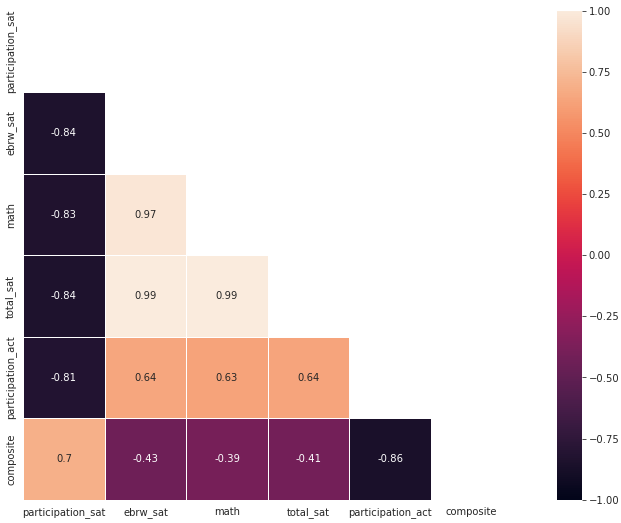

In [913]:
# Establish size of figure.
plt.figure(figsize = (16,9))
# Get correlation of variables.
corr = db_satact_all.corr()
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)

- There is high negative correlation ACT participation rate and SAT participation rate. 
- A declining in participation in ACT will result in increasing participation in SAT. The people will likely select either one of the SAT or ACT test. To increase participation in SAT, we will need to get focus on states which favour ACT and win them over.
- There is high negative correlation in the ACT scores (english, reading, science, composite) with ACT participation rate. With increased participation, the spread of the scores will be wider and thus overall average scores will be lower.
- The same goes to explain the SAT scores (total, math, ebrw) has high negative correlation with the SAT participate rate.

## I am plotting a histogram to find out the spread of the ACT participation from 2017 to 2019

Median :  0.655
Mean :  0.6145512820512818


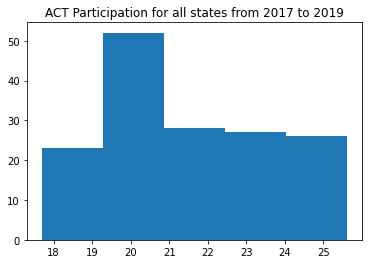

In [914]:
plt.hist(db_act_all['composite'], bins = 5)
plt.title('ACT Participation for all states from 2017 to 2019');
print("Median : ",db_act_all['participation'].median())
print("Mean : ",db_act_all['participation'].mean())

**Distribution is slightly positively skewed whereby mean (21.47)> median (21.15)**

## I am plotting a histogram to find out the spread of the SAT participation from 2017 to 2019

Median :  0.5
Mean :  0.44869281045751647


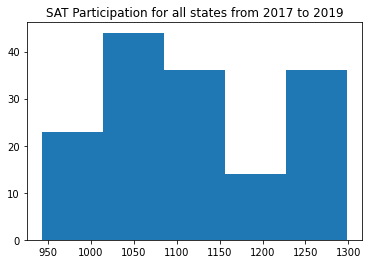

In [915]:
plt.hist(db_sat_all['total'], bins = 5)
plt.title('SAT Participation for all states from 2017 to 2019');
print("Median : ",db_sat_all['participation'].median())
print("Mean : ",db_sat_all['participation'].mean())

**The distribution for SAT participation has two peaks. This may be due to polcy whereby some states choose to use SAT as the standardized test for college entry**

## I am plotting a boxplot to find out the spread of ACT participation from 2017 to 2019

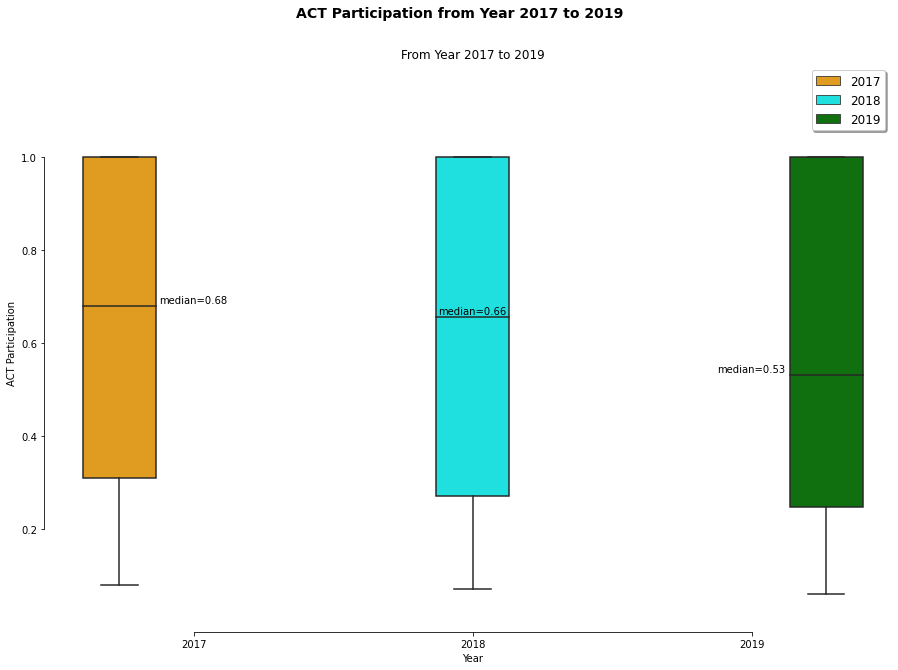

In [916]:
# Plot boxplot using seaborn on ACT
fig = plt.figure(1, figsize=(15,10))
fig.suptitle("ACT Participation from Year 2017 to 2019", fontsize=14, fontweight='bold')
fig.set_facecolor("white")
ax = fig.add_subplot()
fig.subplots_adjust(top=0.90)
ax.set_facecolor("white")
ax.set_title("From Year 2017 to 2019", fontsize=12)
bb=sns.boxplot(x="year", y="participation", hue="year", palette=["orange", "cyan", "green"], data=db_act_all)
sns.despine(offset=10, trim=True)
db_act_all_2017 = db_act_all[db_act_all['year'] == '2017']
db_act_all_2018 = db_act_all[db_act_all['year'] == '2018']
db_act_all_2019 = db_act_all[db_act_all['year'] == '2019']
medians = db_act_all_2017['participation'].median(), db_act_all_2018['participation'].median(), db_act_all_2019['participation'].median()
vertical_offset = db_act_all['participation'].median()*0.01
for xtick in bb.get_xticks():
    bb.text(xtick, medians[xtick] + vertical_offset, "median={:.2f}".format(medians[xtick]), horizontalalignment='center', size='medium', color='k', weight='light')
ax.set_xlabel("Year")
ax.set_ylabel("ACT Participation")
ax.set_ylim(0, 1.2)
legend = ax.legend(loc='upper right', shadow=True, fontsize=12)
plt.show()


**Based on the boxplot, we can see the participation rate for ACT has been decreasing from 2017 to 2019**

## I am plotting a boxplot to find out the spread of SAT participation from 2017 to 2019

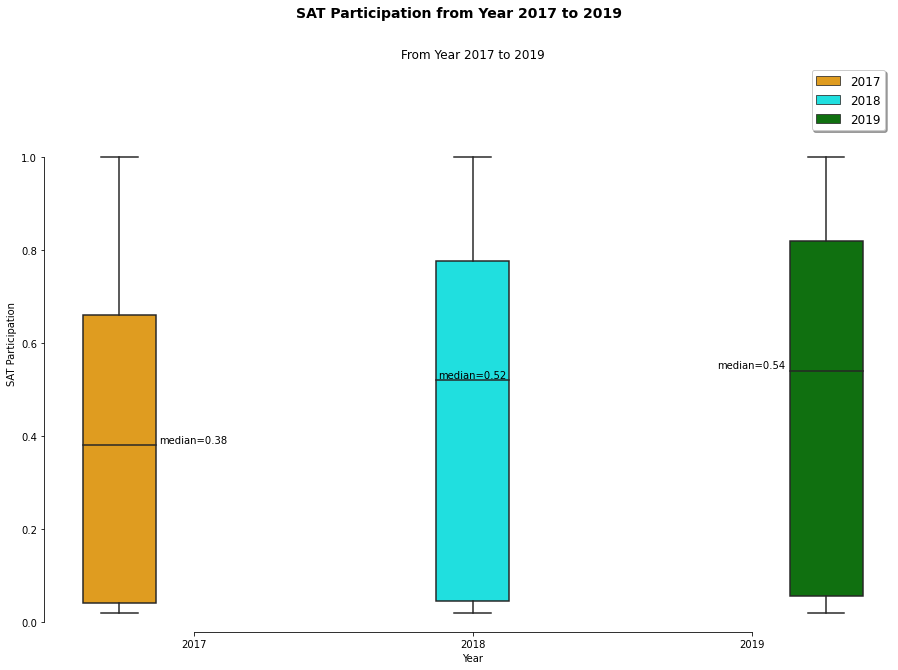

In [917]:
# Plot boxplot using seaborn on SAT
fig = plt.figure(1, figsize=(15,10))
fig.suptitle("SAT Participation from Year 2017 to 2019", fontsize=14, fontweight='bold')
fig.set_facecolor("white")
ax = fig.add_subplot()
fig.subplots_adjust(top=0.90)
ax.set_facecolor("white")
ax.set_title("From Year 2017 to 2019", fontsize=12)
#sns.set(style="ticks", palette="pastel")
bb=sns.boxplot(x="year", y="participation", hue="year", palette=["orange", "cyan", "green"], data=db_sat_all)
sns.despine(offset=10, trim=True)
db_sat_all_2017 = db_sat_all[db_sat_all['year'] == '2017']
db_sat_all_2018 = db_sat_all[db_sat_all['year'] == '2018']
db_sat_all_2019 = db_sat_all[db_sat_all['year'] == '2019']
medians = db_sat_all_2017['participation'].median(), db_sat_all_2018['participation'].median(), db_sat_all_2019['participation'].median()
vertical_offset = db_sat_all['participation'].median()*0.01
for xtick in bb.get_xticks():
    bb.text(xtick, medians[xtick] + vertical_offset, "median={:.2f}".format(medians[xtick]), horizontalalignment='center', size='medium', color='k', weight='light')
ax.set_xlabel("Year")
ax.set_ylabel("SAT Participation")
ax.set_ylim(0, 1.2)
legend = ax.legend(loc='upper right', shadow=True, fontsize=12)
plt.show()

**Based on the boxplot, we can see the participation rate for SAT has been increasing from 2017 to 2019. The adoption of SAT has been improving throughout the years.**

## I am plotting a scatter plot to find out relationship between ACT participation and SAT participation

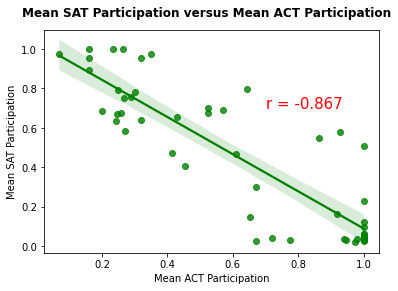

In [918]:
db_satact_all_state = db_satact_all.groupby(['state']).mean()
db_satact_all_state = db_satact_all_state.reset_index()
# Establish the size of the figure.
fig = plt.figure(1, figsize=(6, 4))
fig.suptitle("Mean SAT Participation versus Mean ACT Participation", fontsize=12, fontweight='bold')
fig.set_facecolor("white")
ax = fig.add_subplot()
fig.subplots_adjust(top=0.90)
ax.set_facecolor("white")
# Create scatterplot of Mean ACT Participation versus Mean ACT Participation
sns.regplot(
    x='participation_act', 
    y='participation_sat',
    data=db_satact_all_state,
    color = 'green',
);
mean_act_sat_part_total_corr = db_satact_all_state['participation_act'].corr(db_satact_all_state['participation_sat'], method='pearson')
plt.text(0.7, 0.7, 'r = {:.3f}'.format(mean_act_sat_part_total_corr), color="red", fontsize=15)
ax.set_xlabel("Mean ACT Participation")
ax.set_ylabel("Mean SAT Participation")
#ax.set_ylim(920, 1320)
plt.show()



- There is high negative correlation between ACT and SAT Participation.

## I am plotting a line chart to find out the participation rate for both ACT and SAT from year 2017 to 2019

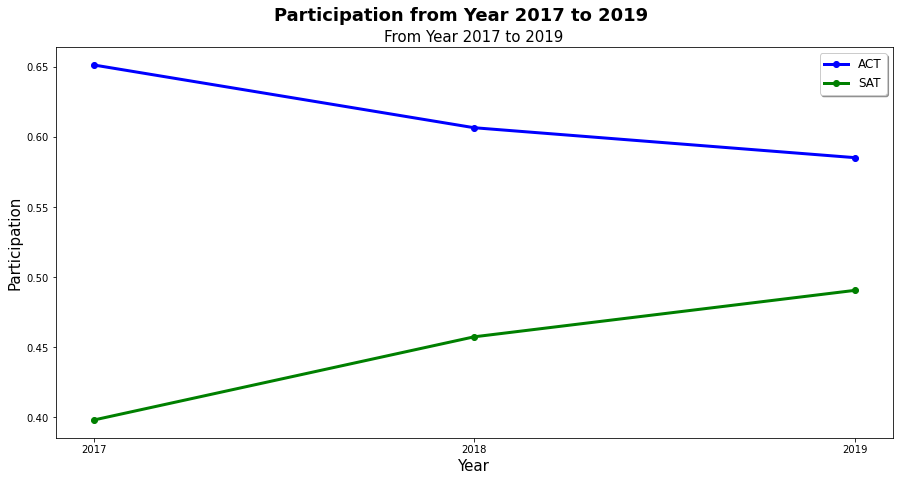

In [919]:

# Group ACT data by year and calulate mean for each year
db_act_all_part = db_act_all.groupby(['year']).mean()
db_act_all_part1 = db_act_all_part.reset_index()
# Group SAT data by year and calulate mean for each year
db_sat_all_part = db_sat_all.groupby(['year']).mean()
db_sat_all_part1 = db_sat_all_part.reset_index()
# Plot line graph for ACT and SAT participation from year 2017 to 2019
db_act_all_part2 = db_act_all_part1.iloc[:,1]
db_sat_all_part2 = db_sat_all_part1.iloc[:,1]
fig = plt.figure(1, figsize=(15,7))
fig.suptitle("Participation from Year 2017 to 2019", fontsize=18, fontweight='bold')
fig.set_facecolor("white")
ax = fig.add_subplot()
fig.subplots_adjust(top=0.90)
ax.set_facecolor("white")
ax.set_title("From Year 2017 to 2019", fontsize=15)
ax.plot(db_act_all_part1['year'], db_act_all_part2, 'bo-', label='ACT', linewidth=3)
ax.plot(db_sat_all_part1['year'], db_sat_all_part2, 'go-', label='SAT', linewidth=3)
ax.set_xlabel("Year", fontsize=15)
ax.set_ylabel("Participation", fontsize=15)
plt.xticks(db_act_all_part1['year'], fontsize=10, rotation = 0)
legend = ax.legend(loc='upper right', shadow=True, fontsize=12)
plt.show()


**As seen in plot above, the SAT participation has been increasing from 2017 to 2019 while the ACT participation rate has been decreasing. This may be due to SAT is gaining more market share. Possible ACT participants switched to SAT from 2017 to 2019**

## I am plotting a bar chart to find out the SAT participation rates for all states

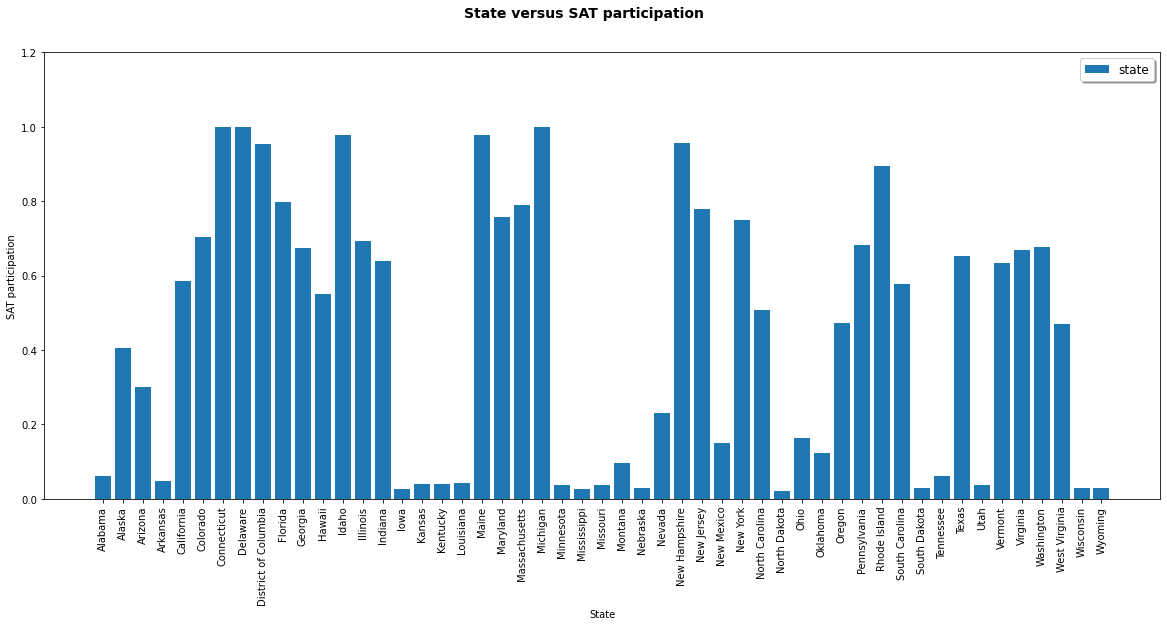

In [920]:
# Establish the size of the figure.
fig = plt.figure(1, figsize=(20,8))
# Create bar chart of state versus SAT participation.
fig.suptitle("State versus SAT participation", fontsize=14, fontweight='bold')
fig.set_facecolor("white")
ax = fig.add_subplot()
fig.subplots_adjust(top=0.90)
ax.set_facecolor("white")
w = 0.8
plt.bar(db_satact_all_state['state'], db_satact_all_state['participation_sat'], label = "state", width=w)
ax.set_xlabel("State")
ax.set_ylabel("SAT participation")
ax.set_ylim(0, 1.2)
plt.xticks(db_satact_all_state['state'], fontsize=10, rotation = 90)
legend = ax.legend(loc='upper right', shadow=True, fontsize=12)
plt.show()

**Alabama, Akansas, Iowa, Kansas, Kentucky, Louisana, Minesta, Missisippi, Missouri, Montana, Nebraska, New Mexico, North Dakota, South Dakota, Tenessee, Utag, Wscomsin, Wyoming has extremely low participation**

## I am plotting a bar chart to find out the ACT participation rates for all states

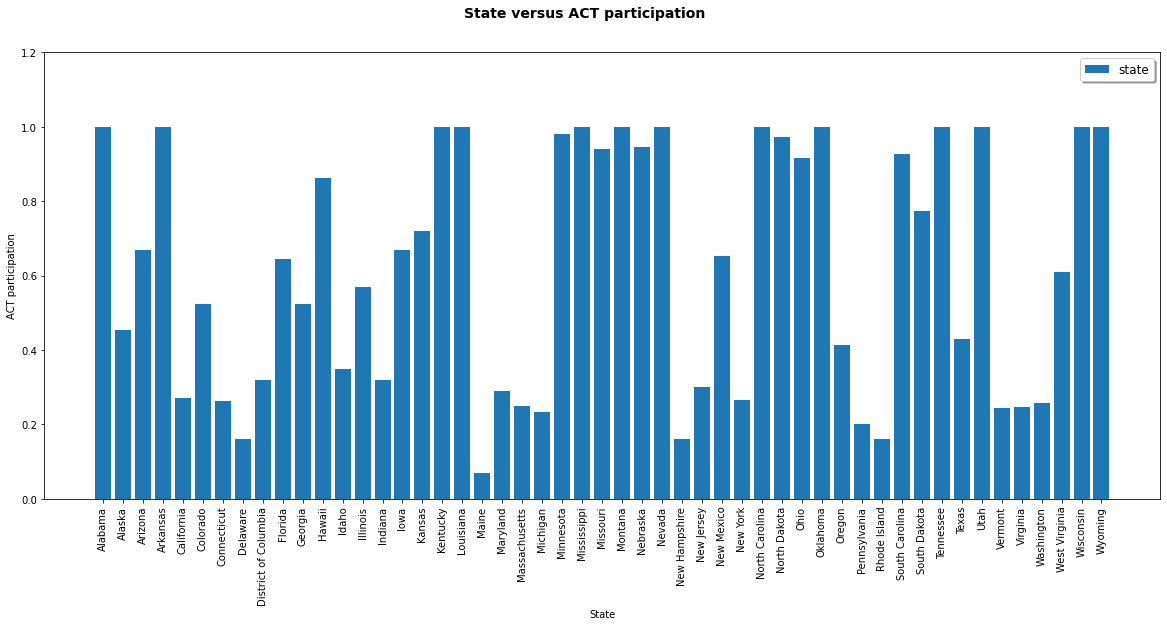

In [921]:
# Establish the size of the figure.
fig = plt.figure(7, figsize=(20,8))
# Create bar chart of state versus ACT participation.
fig.suptitle("State versus ACT participation", fontsize=14, fontweight='bold')
fig.set_facecolor("white")
ax = fig.add_subplot()
fig.subplots_adjust(top=0.90)
ax.set_facecolor("white")
w = 0.8
plt.bar(db_satact_all_state['state'], db_satact_all_state['participation_act'], label = "state", width=w)
ax.set_xlabel("State")
ax.set_ylabel("ACT participation")
ax.set_ylim(0, 1.2)
plt.xticks(db_satact_all_state['state'], fontsize=10, rotation = 90)
legend = ax.legend(loc='upper right', shadow=True, fontsize=12)
plt.show()

- Alabama, Akansas, Iowa, Kansas, Kentucky, Louisana, Minesota, Missisippi, Missouri, Montana, Nebraska, New Mexico, North Dakota, South Dakota, Tenessee, Utag, Wscomsin, Wyoming has extremely low SAT participation
- As check against ACT participation, Alabama, Akansas, Iowa, Kansas, Kentucky, Louisana, Minesota, Missisippi, Missouri, Montana, Nebrasja, New Mexico, North Dakota, South Dakota, Tenessee, Wscomsin and Wyoming has good ACT participation**
- Clearly, we need to target those low participation states as listed to promote SAT

## Outside Research

**Why exceptional low SAT participation for some states?**
- 
- North Dakota colleges may drop requirement for ACT, SAT scores 2022 school year https://www.inforum.com/news/north-dakota/north-dakota-colleges-may-drop-requirement-for-act-sat-scores

- The Iowa Board of Regents has waived the requirement for students needing to submit either an ACT or SAT in order to be admitted for the Fall 2022 term. Students who wish to be considered for admission without a test score may leave the test score section blank on the application.https://www.iowaregents.edu/news/board-news/board-of-regents-waives-requirement-for-actsat-score-for-next-years-entering-class#:~:text=The%20Board%20of%20Regents%2C%20State%20of%20Iowa%2C%20has,of%20Northern%20Iowa%20for%20next%20year%E2%80%99s%20entering%20class.

- Alabama colleges back away from using ACT/SAT scores for admission https://www.al.com/news/2020/10/alabama-colleges-back-away-from-using-actsat-scores-for-admission.html

- which state require SAT or ACT? https://www.edweek.org/teaching-learning/which-states-require-students-to-take-the-sat-or-act

## Conclusions and Recommendations

- Overall, SAT participation from 2017 and 2019 has been increasing. Based on the observation, we clearly know that the SAT participation and ACT participation is negatively correlated. 
- In the bar chart of the states verus the participation, we know that Alabama, Akansas, Iowa, Kansas, Kentucky, Louisana, Minesota, Missisippi, Missouri, Montana, Nebraska, New Mexico, North Dakota, South Dakota, Tenessee, Utah, Wsconsin, Wyoming has extremely low SAT participation.
- ACT participation is high in these states. 
- Outside Research confirms that Alabama, Kentucky, Missisippi, Montana, Nebraska, North Dakota, Utah, Wsconsin, Wyoming is adopting ACT as the defacto test for college admission
- I will recommend to target the SAT marketing to the states (eg. Akansas, Iowa, Kansas, Louisana, Minesota, Missouri,New Mexico, South Dakota, Tenessee) and woo them over to SAT